# 주식 데이터

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

# 폰트 설정 (한글 깨짐 방지)
plt.rcParams['axes.unicode_minus'] = False
try:
    font_path = "/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf"
    font_prop = font_manager.FontProperties(fname=font_path)
    rc('font', family=font_prop.get_name())
except:
    print("한글 폰트 설정 실패, 기본 폰트로 진행합니다.")

한글 폰트 설정 실패, 기본 폰트로 진행합니다.


# 주가 데이터 불러오기

In [ ]:
import FinanceDataReader as fdr
import pandas as pd

sk_code = '000660'
start_date = '2025-10-01'
end_date = '2025-11-21'

print(f"SK하이닉스({sk_code}) 주가 데이터를 수집합니다... ({start_date} ~ {end_date})")

# 데이터 가져오기
df_stock = fdr.DataReader(sk_code, start_date, end_date)
# df_stock.head()
df_stock = df_stock.reset_index()
df_stock.info()
df_stock.rename(columns = {'Date' : 'date'}, inplace = True)

# .pct_change() : 데이터가 이전 값 대비 몇 퍼센트(%) 변했는지를 자동으로 계산해주는 함수 
# 수익률 계산
df_stock['ret_T1'] = df_stock['Close'].shift(-1).pct_change().round(4) # 1일 뒤 수익률
df_stock['ret_T3'] = (df_stock['Close'].shift(-3) / df_stock['Close'] - 1).round(4)
df_stock['ret_T5'] = (df_stock['Close'].shift(-5) / df_stock['Close'] - 1).round(4)

df_stock.head()
# df_stock.to_csv('../mini_project1/preprocessed_data/4분기 주가 데이터.csv')
# 

SK하이닉스(000660) 주가 데이터를 수집합니다... (2025-10-01 ~ 2025-11-21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    33 non-null     datetime64[ns]
 1   Open    33 non-null     int64         
 2   High    33 non-null     int64         
 3   Low     33 non-null     int64         
 4   Close   33 non-null     int64         
 5   Volume  33 non-null     int64         
 6   Change  33 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 1.9 KB


C:\Users\82104\AppData\Local\Temp\ipykernel_32048\1014554821.py:19: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_stock['ret_T1'] = df_stock['Close'].shift(-1).pct_change().round(4) # 1일 뒤 수익률


C:\Users\82104\AppData\Local\Temp\ipykernel_32048\605496780.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()                            # 범례(이름표) 표시


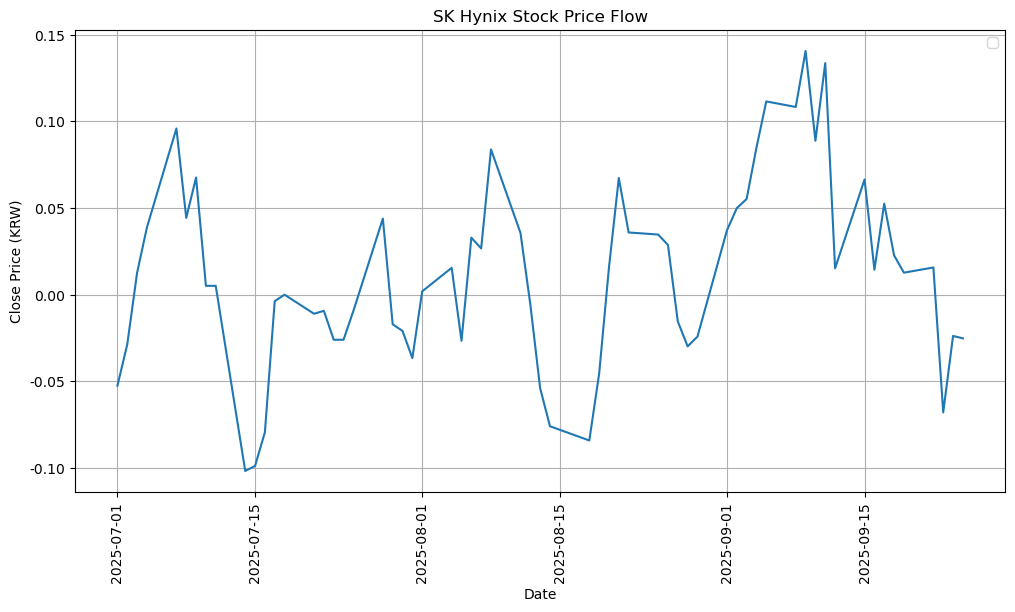

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# 꺾은선 그래프 -> y축은 3일 후의 수익률
plt.plot(df_stock['date'], df_stock['ret_T3'])

plt.title('SK Hynix Stock Price Flow')  # 제목
plt.xlabel('Date')                      # X축 라벨
plt.ylabel('Close Price (KRW)')         # Y축 라벨
plt.grid(True)                          # 격자(모눈) 표시
plt.legend()                            # 범례(이름표) 표시
plt.xticks(rotation=90)
plt.show()

In [5]:
df_stock1 = pd.read_csv('../mini_project1/preprocessed_data/1분기 주가 데이터.csv')
df_stock2 = pd.read_csv('../mini_project1/preprocessed_data/2분기 주가 데이터.csv')
df_stock3 = pd.read_csv('../mini_project1/preprocessed_data/3분기 주가 데이터.csv')
df_stock4 = pd.read_csv('../mini_project1/preprocessed_data/4분기 주가 데이터.csv')

In [7]:
stock_merged_df = pd.concat([df_stock1,df_stock2,df_stock3, df_stock4])
stock_merged_df.to_csv('../mini_project1/preprocessed_data/stock_merged.csv', encoding= 'utf-8-sig')